In [3]:
import mlflow
import git
import dvc.api
import pandas as pd

In [4]:
repo = git.Repo(r"D:\WorkSpace\ITI\DS in production\iris_project\.git")

def print_repository_info(repo):
    print('Repository description: {}'.format(repo.description))
    print('Repository active branch is {}'.format(repo.active_branch))

    for remote in repo.remotes:
        print('Remote named "{}" with URL "{}"'.format(remote, remote.url))

    print('Last commit for repository is {}.'.format(str(repo.head.commit.hexsha)))

    
def print_commit_data(commit, req_ver):

    print('-----')
    print(str(commit.hexsha))
    print("\"{}\" by {} ({})".format(commit.summary, commit.author.name, commit.author.email))
    print(str(commit.authored_datetime))
    print(str("count: {} and size: {}".format(commit.count(), commit.size)))    
    if req_ver in commit.summary:
        return(str(commit.hexsha))
    else :
        return("")
    

In [25]:
    data_path= 'D:\WorkSpace\ITI\DS in production\iris_project\dataset\Iris.csv'
    repo_path= 'D:\WorkSpace\ITI\DS in production\iris_project'
    ver_no= 'ver2'


    resource_url = dvc.api.get_url(
    data_path,

    repo = repo_path,
    rev = ver_no
    )

    print('-----')
    print(resource_url)    
        
    df = pd.read_csv(resource_url, sep=',')
    print(len(df))
    display(df) 

-----
D:\WorkSpace\ITI\DS in production\iris_project\remote\71\fe66e6066491615564d30adb6ec260
124


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
119,120,6.0,2.2,5.0,1.5,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
121,122,5.6,2.8,4.9,2.0,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica


In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [27]:
sns.set_style("darkgrid")

# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

# filter all warnings
warnings.filterwarnings('ignore') 


In [28]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             124 non-null    int64  
 1   SepalLengthCm  124 non-null    float64
 2   SepalWidthCm   124 non-null    float64
 3   PetalLengthCm  124 non-null    float64
 4   PetalWidthCm   124 non-null    float64
 5   Species        124 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ KB


In [30]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,62.500000,5.683871,3.058871,3.399194,1.028226
std,35.939764,0.789915,0.460295,1.726997,0.720610
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,31.750000,5.000000,2.800000,1.500000,0.200000
50%,62.500000,5.600000,3.000000,4.000000,1.200000
75%,93.250000,6.300000,3.400000,4.700000,1.500000
max,124.000000,7.700000,4.400000,6.900000,2.500000


In [31]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     24
Name: Species, dtype: int64

In [32]:
rows, col = df.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 124, column : 6


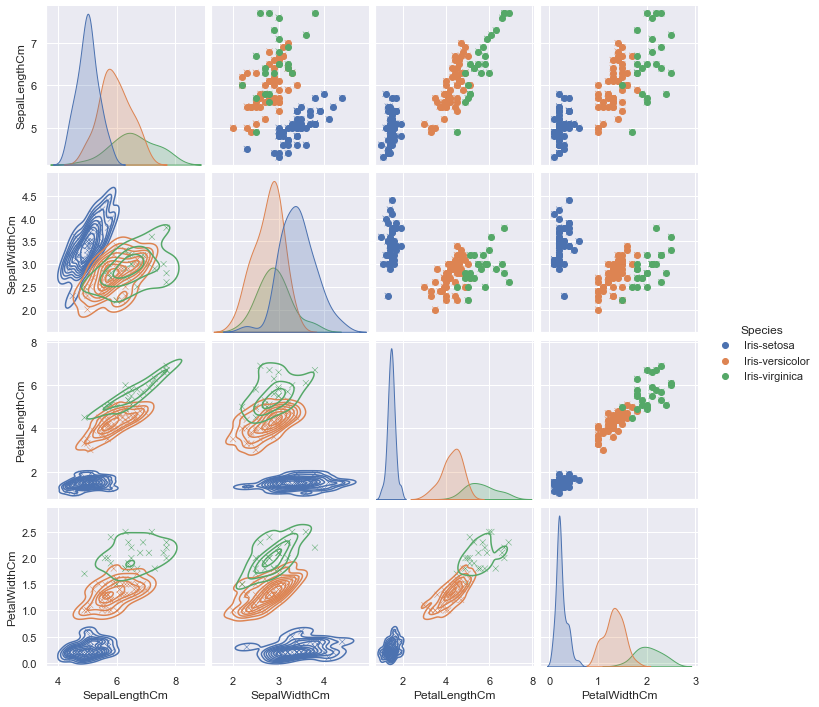

In [33]:
snsdata = df.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

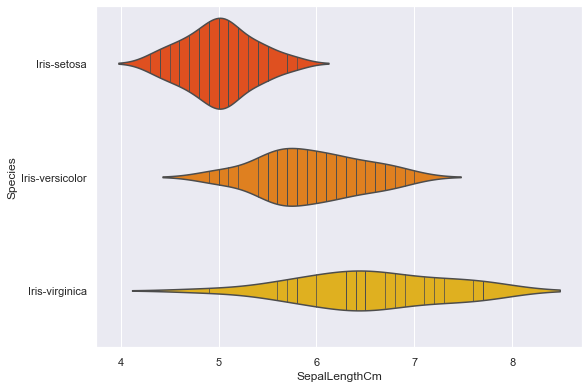

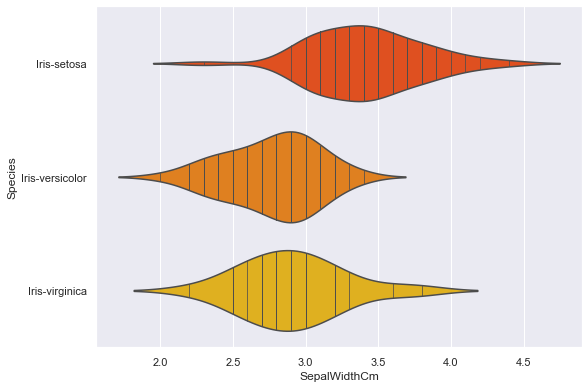

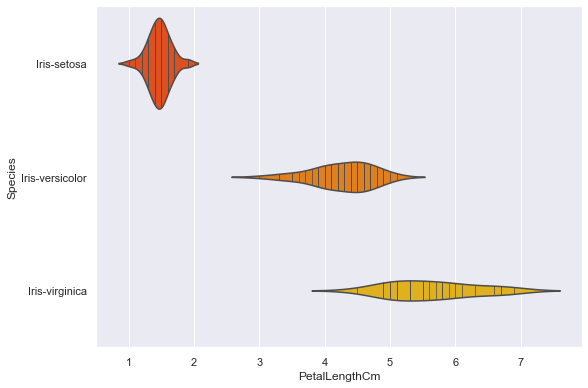

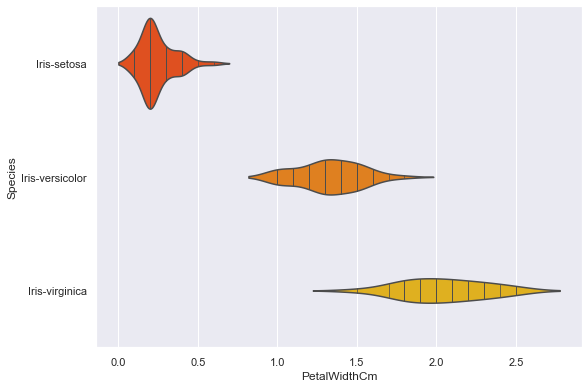

In [34]:
sns.violinplot(x='SepalLengthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='SepalWidthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalLengthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalWidthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()

In [35]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

X = df.drop(['Id', 'Species'], axis=1).values # Input Feature Values
y = df.Species.replace(mapping).values.reshape(rows,1) # Output values

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias

In [36]:
np.random.seed(42) # Let's set the zero for time being
theta = np.random.randn(1,5) # Setting values of theta randomly

print("Theta : %s" % (theta))

Theta : [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]]


In [37]:
iteration = 10000
learning_rate = 0.003 # If you are going by formula, this is actually alpha.
J = np.zeros(iteration) # 1 x 10000 maxtix

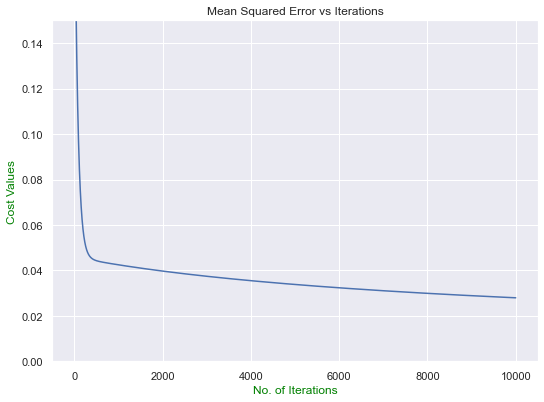

In [38]:
# Let's train our model to compute values of theta
for i in range(iteration):
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))

prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()

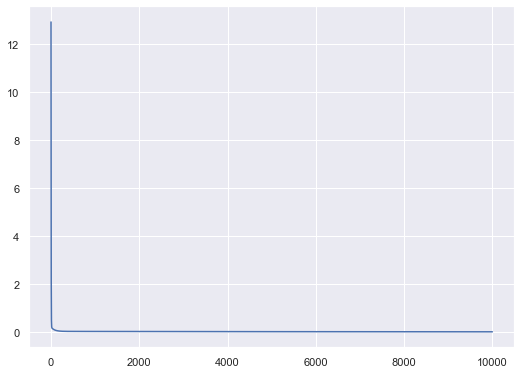

In [39]:
ax = sns.lineplot(x=np.arange(iteration), y=J)
plt.show()

In [41]:
accuracy = (sum(prediction == y)/float(len(y)) * 100)[0]
print("The model predicted values of Iris dataset with an overall accuracy of %s" % (accuracy))

The model predicted values of Iris dataset with an overall accuracy of 95.96774193548387


In [42]:
remote_server_uri = "http://127.0.0.1:5000" # set to your server URI
mlflow.set_tracking_uri(remote_server_uri)
# Note: on Databricks, the experiment name passed to mlflow_set_experiment must be a
# valid path in the workspace
mlflow.set_experiment("/Iris-Experiment")
with mlflow.start_run():
    mlflow.log_param("Requested Version", ver_no)
    mlflow.log_param("Requested Version path", resource_url)
    mlflow.log_param("Requested Version Count", len(df))
    mlflow.log_param("Requested Version Accuracy", accuracy)